In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import time, warnings
warnings.filterwarnings("ignore")
from torchvision import transforms, datasets
from copy import deepcopy
from main import RC, config

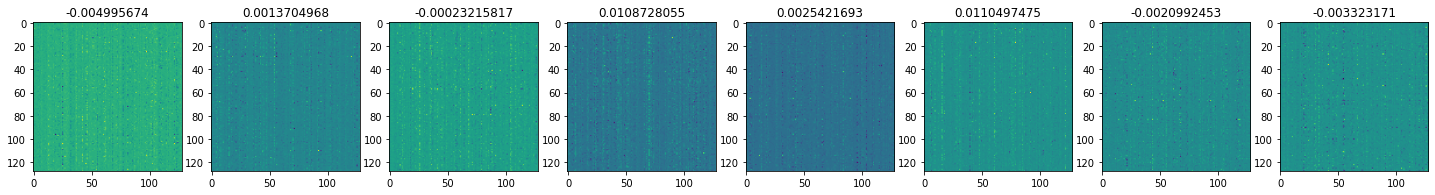

In [2]:
from sparch import SNN, RadLIFLayer,ReadoutLayer, SpikeFunctionBoxcar, Experiment, config
exp = Experiment()
model = SNN()
model_log = torch.load(r'F:\GitHubClone\Reservoir-Computing\SHD\log\07-27-18-28\checkpoints\best_model.pth', map_location='cpu')
plt.figure(figsize=(25,5))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(model_log.snn[0].V.weight.data.numpy()[i*128:(i+1)*128, i*128:(i+1)*128])
    plt.title(model_log.snn[0].V.weight.data.numpy()[i*128:(i+1)*128, i*128:(i+1)*128].mean())

In [26]:
checkpoint_dir = r'./log\07-30-02-49\checkpoints'
best_acc = 0.8189709595959597
model_param = torch.load(f"{checkpoint_dir}/best_model-{best_acc}.tar", map_location='cpu')[0]

In [20]:
model_param, mask = torch.load(r'F:\GitHubClone\Reservoir-Computing\SHD\log\07-30-02-49\checkpoints\best_model-0.800189393939394.tar')
model.load_state_dict(model_param)
model = model.to('cuda')

firing_ = np.zeros((20, 1024))
for step, (x, _, y) in enumerate(exp.valid_loader):
    output, firing_rates, all_spikes = model(x.to('cuda'), [mask[0].to('cuda'), mask[1].to('cuda'), 0])
    for i, label in enumerate(y):
        firing_[label, :] += all_spikes[0].mean(1)[i].cpu().detach().numpy()

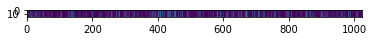

In [21]:
plt.imshow(firing_)

In [ ]:
test_X = np.load('data/testX_4ms.npy')
test_y = np.load('data/testY_4ms.npy').astype(float)

tensor_testX = torch.Tensor(test_X)  # transform to torch tensor
tensor_testY = torch.Tensor(test_y)
test_dataset = torch.utils.data.TensorDataset(tensor_testX, tensor_testY)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=config.batch, shuffle=False)


In [ ]:
model_file = r'F:\GitHubClone\Reservoir-Computing\NMNIST\log\07-17-21-29\model-0-50-96.77.tar'
date = model_file.split('\log')[1][1:12]
model_parameter, mask = torch.load(model_file)

config.device = 'cpu'
model = RC().to(config.device)
print(model.tau_adp_h1[0])
model.load_state_dict(model_parameter)
print(model.tau_adp_h1[0])
print((mask[0]==0).sum()/config.hid**2)